In [4]:
import numpy as np
import networkx as nx
from networkx.algorithms import floyd_warshall_numpy

In [2]:
cities = [
    "Inverness",
    "Aberdeen",
    "Leuchars",
    "StAndrews",
    "Edinburgh",
    "Glasgow",
    "York",
    "Cologne",
    "Carlisle",
    "Birmingham",
    "London",
    "Brussels",
    "Toronto",
    "Winnipeg",
    "Saskatoon",
    "Edmonton",
    "Jasper",
    "Vancouver"
  ];

connections = [
    ( "Inverness", "Aberdeen", 3, 2.5 ), # A, B, eta:A->B, eta:A<-B
    ( "Aberdeen", "Leuchars", 1.5, 1 ),
    ( "Leuchars", "Edinburgh", 1.5, 3 ),
    ( "Edinburgh", "Glasgow", 1, 1 ),
    ( "Edinburgh", "York", 3.5, 4 ),
    ( "Glasgow", "Carlisle", 1, 1 ),
    ( "Carlisle", "York", 2.5, 3.5 ),
    ( "Carlisle", "Birmingham", 2.0, 1 ),
    ( "Birmingham", "London", 1.5, 2.5 ),
    ( "Leuchars", "StAndrews", 0.2, 0.2 ),
    ( "York", "London", 1.8, 2.0 ),
    ( "London", "Brussels", 2.5, 3.5 ),
    ( "Brussels", "Cologne", 2, 1.5 ),
    ( "Toronto", "Winnipeg", 36, 35 ),
    ( "Winnipeg", "Saskatoon", 12, 5 ),
    ( "Saskatoon", "Edmonton", 12, 17 ),
    ( "Edmonton", "Jasper", 6, 5 ),
    ( "Jasper", "Vancouver", 12, 13 )
]

## Build graph

In [5]:
G = nx.DiGraph()
for city in cities:
    G.add_node(city) 

for connection in connections:
    a, b, ab, ba = connection

    G.add_weighted_edges_from([(a, b, ab)])
    G.add_weighted_edges_from([(b, a, ba)])


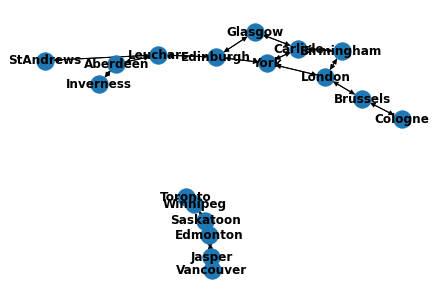

In [6]:
# Plot it
nx.draw(G, with_labels=True, font_weight='bold')

## Store graph
Create distance matrix and store graph

In [11]:
distance_matrix = floyd_warshall_numpy(G)
np.savetxt("data/distances.csv", distance_matrix, delimiter=",", header=",".join(G.nodes()))
print(distance_matrix[0,2]) # From Invernees to Leuchards

4.5


## Read graph

In [12]:
distance_matrix = np.genfromtxt("data/distances.csv", delimiter="," )
print(distance_matrix[0,2]) # From Invernees to Leuchards

4.5
